# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:/Users/rstev/Documents/06_22 Etsy Top 10000 Sellers/Scripts/Example Exercises/us-states.json'

In [4]:
country_geo

'C:/Users/rstev/Documents/06_22 Etsy Top 10000 Sellers/Scripts/Example Exercises/us-states.json'

In [5]:
f = open(r'C:/Users/rstev/Documents/06_22 Etsy Top 10000 Sellers/Scripts/Example Exercises/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [6]:
path = 'C:/Users/rstev/Documents/06_22 Etsy Top 10000 Sellers'

In [7]:
# Import the Etsy data

df = pd.read_csv(os.path.join(path, 'Data', 'Etsy Top Sellers Data_Prepared v3.csv'))

In [8]:
df.head()

,Unnamed: 0,shop_id,shop_name,url,shop_create_date,month_create,year_create,shop_update_date,sold_count,additional_customization,...,average_rating,total_rating_count,average_rating_count,accepts_direct_checkout,accepts_paypal,ships_to_country_ids,is_eligible_free_shipping,has_min_free_shipping,has_free_shipping,ships_to_regions
0,0,6923427,kawaiistickers4you,https://www.etsy.com/shop/kawaiistickers4you,5/18/2012,May,2012,1643091607,27723,False,...,1.0,9628,1,False,True,"[193, 105, 99, 129, 215, 220, 128, 103, 165, 1...",True,True,True,NaN
1,1,5242648,JustForMeSewing,https://www.etsy.com/shop/JustForMeSewing,10/4/2010,October,2010,1632363895,39900,False,...,5.0,5470,1,True,False,"[209, 0, 79, 123, 61, 220]",True,True,True,NaN
2,2,5593341,SwellAndGrand,https://www.etsy.com/shop/SwellAndGrand,10/4/2010,October,2010,1640184600,33696,False,...,5.0,4595,1,True,False,"[0, 209]",True,True,True,NaN
3,3,6441254,PrettyThingsSupplies,https://www.etsy.com/shop/PrettyThingsSupplies,7/30/2011,July,2011,1647391292,29155,False,...,5.0,7851,1,True,False,"[79, 105, 93, 103, 61, 123, 91, 209, 0, 193, 1...",True,True,True,NaN
4,4,6176258,KangarooCare,https://www.etsy.com/shop/KangarooCare,1/17/2011,January,2011,1647708638,25779,True,...,5.0,3975,1,True,False,"[131, 191, 148, 189, 145, 165, 118, 100, 272, ...",True,True,True,NaN


In [9]:
df.shape

(10000, 26)

### 2. Data wrangling 

In [15]:
# This dataset has information from many countries, but the US makes up over 70% of the total records and also has by far
# the highest number of units sold. A small number of US-based stores do not have state level data though, so will
# create subset filtered down to records with US state info for this exploratory analysis.

In [18]:
df['country'].value_counts(dropna= False)

United States     7135
United Kingdom    1009
Canada             410
China              222
Germany            148
                  ... 
Armenia              1
Chile                1
Jamaica              1
Venezuela            1
Oman                 1
Name: country, Length: 80, dtype: int64

In [13]:
# Create a subset

state_count = df[['state', 'sold_count']]

In [14]:
state_count.head()

,state,sold_count
0,NaN,27723
1,Virginia,39900
2,Illinois,33696
3,Michigan,29155
4,NaN,25779


In [17]:
state_count['state'].value_counts(dropna= False)

NaN                3556
California         1056
Texas               564
Florida             538
New York            360
North Carolina      233
Illinois            209
Pennsylvania        203
Georgia             197
Washington          189
Michigan            182
Ohio                173
Utah                172
Arizona             168
New Jersey          144
Tennessee           144
Oregon              134
Virginia            133
Colorado            119
Indiana              99
Missouri             95
Minnesota            95
Wisconsin            94
Massachusetts        86
South Carolina       80
Idaho                78
Maryland             73
Nevada               73
Louisiana            69
Alabama              66
Kentucky             64
Kansas               55
Connecticut          53
Montana              49
Arkansas             46
Iowa                 44
Oklahoma             38
Mississippi          31
Nebraska             30
New Hampshire        28
Hawaii               27
Maine           

In [19]:
state_count = state_count[state_count['state'].isnull() == False]

In [20]:
state_count['state'].value_counts(dropna= False)

California         1056
Texas               564
Florida             538
New York            360
North Carolina      233
Illinois            209
Pennsylvania        203
Georgia             197
Washington          189
Michigan            182
Ohio                173
Utah                172
Arizona             168
Tennessee           144
New Jersey          144
Oregon              134
Virginia            133
Colorado            119
Indiana              99
Minnesota            95
Missouri             95
Wisconsin            94
Massachusetts        86
South Carolina       80
Idaho                78
Maryland             73
Nevada               73
Louisiana            69
Alabama              66
Kentucky             64
Kansas               55
Connecticut          53
Montana              49
Arkansas             46
Iowa                 44
Oklahoma             38
Mississippi          31
Nebraska             30
New Hampshire        28
Hawaii               27
Maine                24
Rhode Island    

In [22]:
state_count.shape

(6444, 2)

In [23]:
type(state_count)

pandas.core.frame.DataFrame

### 3. Conduct consistency checks

In [24]:
# Check for missing values

state_count.isnull().sum()

state         0
sold_count    0
dtype: int64

##### Duplicates check

In [25]:
dups = state_count.duplicated()

In [26]:
dups.shape # no dups

(6444,)

##### Extreme values checks

<AxesSubplot:xlabel='sold_count', ylabel='Count'>

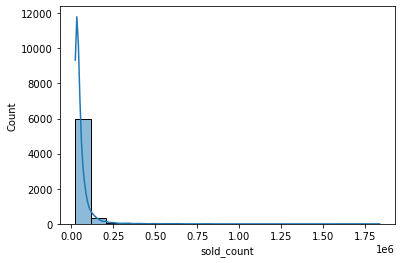

In [32]:
sns.histplot(state_count['sold_count'], bins=20, kde = True) # shows extreme values for 'sold_count'

# There are some values higher than others but nothing that seems inaccurate or needs to be capped.

### 4. Plotting a choropleth

In [35]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = state_count,
    columns = ['state', 'sold_count'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'PuBuGn', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "units sold").add_to(map)
folium.LayerControl().add_to(map)

map

In [34]:
map.save('plot_data.html')

### 6.3 Answer: This map shows how many units are sold across the US. We can see that California, Texas, and interestingly Ohio have the sellers that have the highest sales. California and Texas make sense to me given that those two states have very large populations and therefore, likely more sellers in general. But Ohio has a lower population than those two states so I'd like to look into the Ohio shops more to see why their sales are so high. As noted earlier, this dataset also contains information on sellers in other countries, but it is a smaller subset and likely would not lead to meaningful insights for this project.